In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

%load_ext autoreload
%autoreload
from src.dataLoader import dataLoader
from src.utils import image_utils, ismember

from src.preprocessing import imadjust,imagecrop


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dataset = dataLoader("./data")
imageFileList = dataset.LoadFileList()

In [19]:

image_utils().get_image(imageFileList[0], image_scale=cv2.COLOR_BGR2RGB, is_gray=False).shape

(222, 294, 3)

In [29]:
dataset = []
for image_path in imageFileList:
    # get RGB image
    color_image = image_utils().get_image(image_path, image_scale=cv2.COLOR_BGR2RGB, is_gray=False)
    dataset.append(color_image.reshape(-1))
    # gray_image = image_utils().get_image(image_path, image_scale=cv2.COLOR_BGR2GRAY, is_gray=True)
    # dataset.append(gray_image.reshape(-1))
dataset = np.array(dataset)
dataset.shape

(254, 195804)

In [30]:
n = 6
kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(dataset)
Z = kmeans.predict(dataset)

cluster 0
44 elements


C:\Users\YUANMA\.conda\envs\deeplearn_course\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':


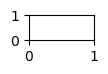

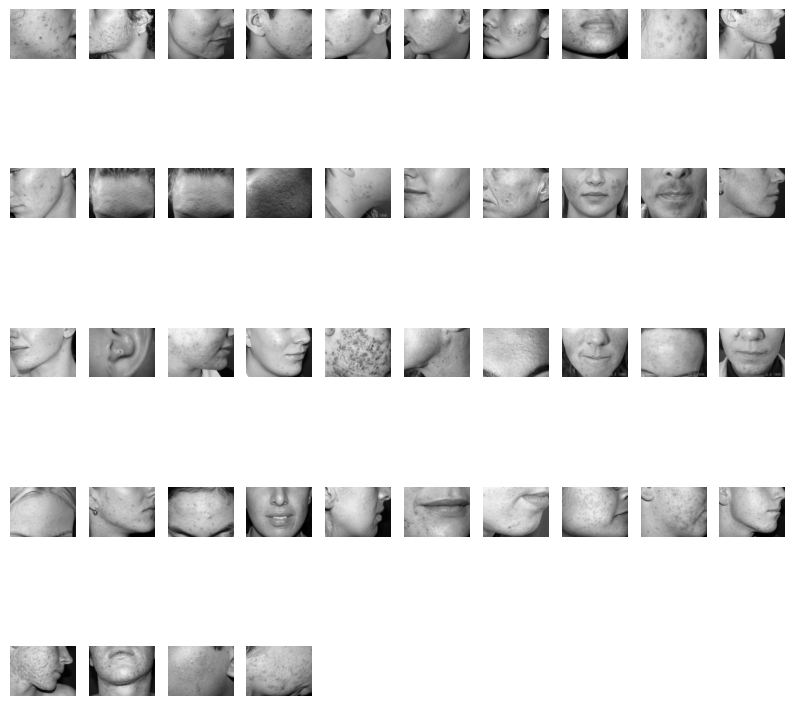

cluster 1
56 elements


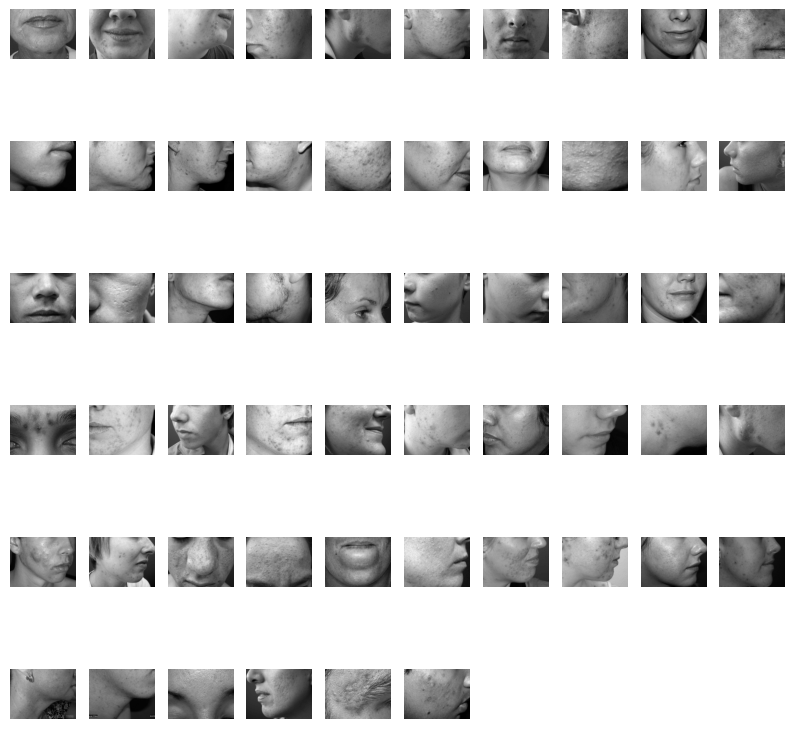

cluster 2
43 elements


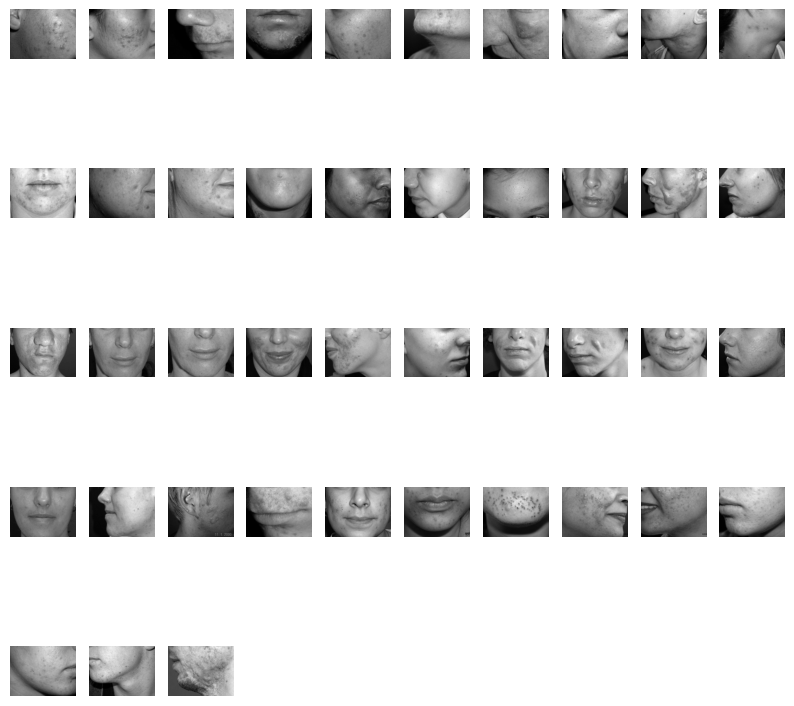

cluster 3
54 elements


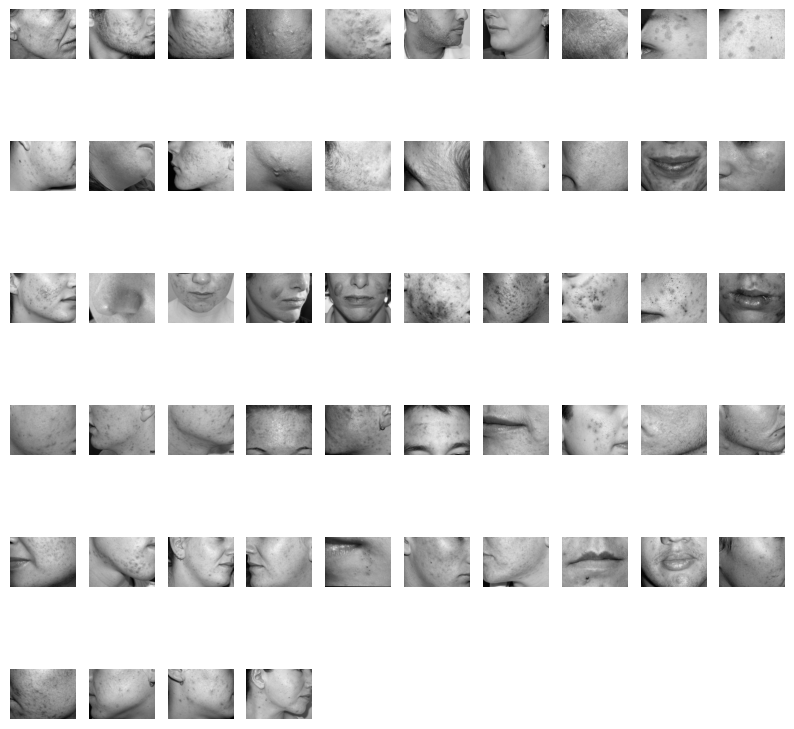

cluster 4
36 elements


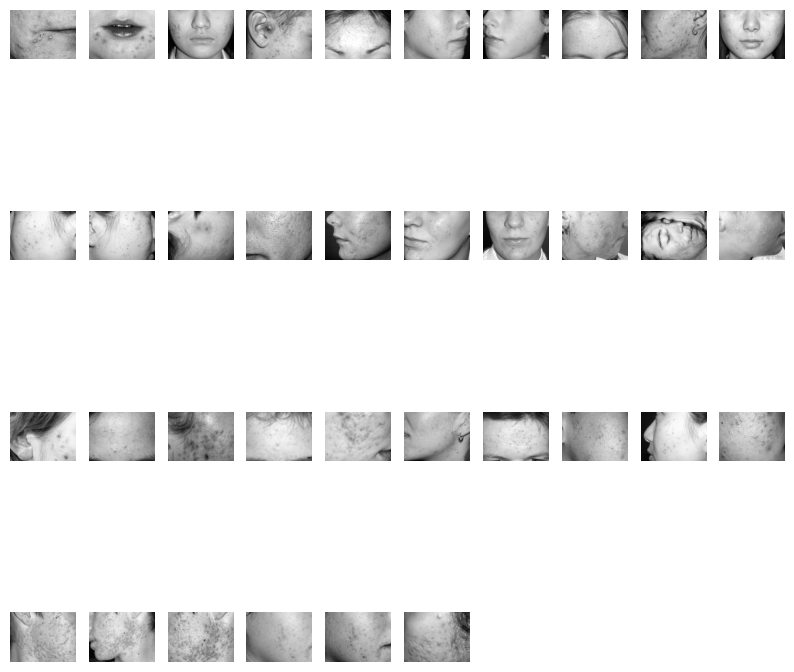

cluster 5
21 elements


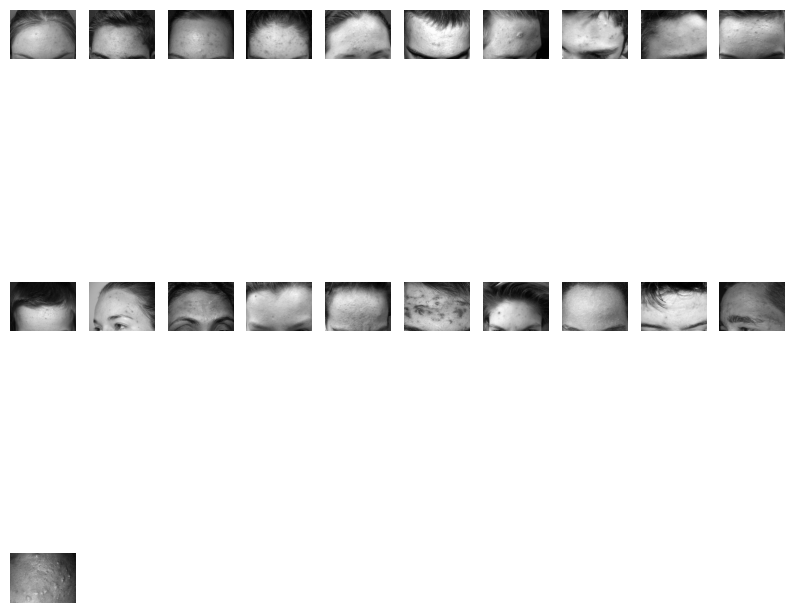

In [28]:
for i in range(0,n):

    row = np.where(Z==i)[0]  # row in Z for elements of cluster i
    num = row.shape[0]       #  number of elements for each cluster
    r = np.floor(num/10.)    # number of rows in the figure of the cluster 

    print("cluster "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = dataset[row[k], ]
        image = image.reshape(222, 294,3)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()